## Linear Regression using Boston Data Set

In [7]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the data 
#Data collection

df=pd.read_csv(r'C:\Users\Rajan Kumar\Documents\Python_Sundog\DataScience\Python_Code_Rajan\data.csv')

# Have a look at Data
df.head()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
##Data Wrangling
## Segregate input data from output data

#input data or Independent Variable

X=df.iloc[:,0:13]

#output data or dependent variable

Y=df['medv']





In [16]:
#Data Analysis
#Data might be correlated
#3.Create a corelation matrix,Higher the absolute value stronger the corellation

import seaborn as sns 
correlation=df.corr()
correlation


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


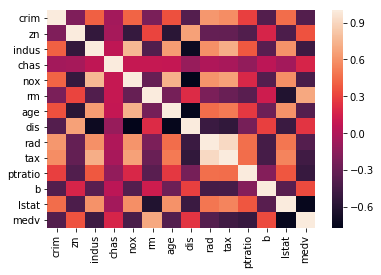

In [33]:
# it is difficult ot see and understand numbers in correlation matric.we create a heatmap which is available in seaborn
#ignore diagonal. see witj 0.9(positive correlation) and -0.6 (negative correlation)
sns.heatmap(correlation)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [38]:
#training the algorithim
#sklearn library is having all the models
#splitting train test data
#random_state  will help : value of combination for train and test will remain same will not change

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=10)

X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
130,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,395.04,12.60
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
345,0.03113,0.0,4.39,0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
84,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62


In [39]:
#model instantinitation
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

#model fitting using input and corresponding output data

lin_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

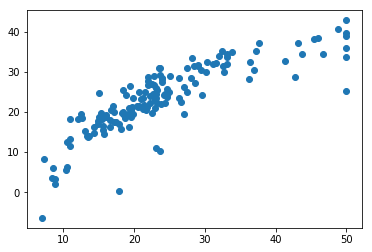

In [43]:
#check model performance ,test algorithm
predicted_house_price=lin_model.predict(X_test)
plt.scatter(Y_test ,predicted_house_price)

In [45]:
df_prd_actual=pd.DataFrame({'predicted': predicted_house_price, 'actual':Y_test})
df_prd_actual.head()

,predicted,actual
305,31.424322,28.4
193,31.967855,31.1
65,30.937854,23.5
349,22.343133,26.6
151,18.838462,19.6


In [46]:
#gives coefficeint of model
lin_model.coef_

array([-1.53776087e-01,  6.50159270e-02, -2.42597326e-02,  1.62203309e+00,
       -1.52999306e+01,  3.35196668e+00,  1.13259963e-02, -1.54810871e+00,
        3.02641886e-01, -1.22317535e-02, -8.11539044e-01,  1.29504798e-02,
       -5.44861583e-01])

In [49]:
#gives intercept of model
lin_model.intercept_
#HousePrice=34.244 + -1.53*crim + 6.5 *zn ...  for 13 coefficient 

34.244837033906755

In [57]:
#Types of model fititng
#under fiting: the solution for underfitting is that you provide more data 
#over fitting:
